<h1 align=center><font size=10>Text Generation Models</font></h1>

### Table of contents

- [Objective](#obj)
- [Data](#data)
- [Word-based Model for Text Generation](#word_based_model)


### Objective <a id="obj"></a>

In this notebook, we will generate texts using word-based or character-based models in Keras.

### Data <a id="data"></a>



#### Loading the Shakespeare dataset

&#x270d; Loading the dataset of Shakespeare's writing from the following link:
https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt

In [0]:
from keras.utils.data_utils import get_file

path = get_file('shakespeare.txt',
                origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

with open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('Length of text: {} characters'.format(len(text)))

Using TensorFlow backend.


1122304/1115394 [==============================] - 0s 0us/step
Length of text: 1115394 characters


&#x270d; Observing first 250 characters in text.

In [0]:
print(text[:250])

first citizen:
before we proceed any further, hear me speak.

all:
speak, speak.

first citizen:
you are all resolved rather to die than to famish?

all:
resolved. resolved.

first citizen:
first, you know caius marcius is chief enemy to the people.



Since this dataset is very large, in continue, we only consider portion of that for processing.

In [0]:
data = text[:5000]

print(data)

first citizen:
before we proceed any further, hear me speak.

all:
speak, speak.

first citizen:
you are all resolved rather to die than to famish?

all:
resolved. resolved.

first citizen:
first, you know caius marcius is chief enemy to the people.

all:
we know't, we know't.

first citizen:
let us kill him, and we'll have corn at our own price.
is't a verdict?

all:
no more talking on't; let it be done: away, away!

second citizen:
one word, good citizens.

first citizen:
we are accounted poor citizens, the patricians good.
what authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them let us revenge this with
our pikes, ere we become rakes: for the gods know i
speak this in hunger for bread, not in thirst for revenge.



### Word-based Model for Text Generation <a id="word_based_model"></a>

#### Preprocessing <a id="preprocessing"></a>

&#x270d; Create a Python list of sentences from the data.

In [0]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:

corpus = data.split('\n')

print(corpus)

['first citizen:', 'before we proceed any further, hear me speak.', '', 'all:', 'speak, speak.', '', 'first citizen:', 'you are all resolved rather to die than to famish?', '', 'all:', 'resolved. resolved.', '', 'first citizen:', 'first, you know caius marcius is chief enemy to the people.', '', 'all:', "we know't, we know't.", '', 'first citizen:', "let us kill him, and we'll have corn at our own price.", "is't a verdict?", '', 'all:', "no more talking on't; let it be done: away, away!", '', 'second citizen:', 'one word, good citizens.', '', 'first citizen:', 'we are accounted poor citizens, the patricians good.', 'what authority surfeits on would relieve us: if they', 'would yield us but the superfluity, while it were', 'wholesome, we might guess they relieved us humanely;', 'but they think we are too dear: the leanness that', 'afflicts us, the object of our misery, is as an', 'inventory to particularise their abundance; our', 'sufferance is a gain to them let us revenge this with', 

&#x270d; Using the Tokenizer class in keras, creating the dictionary of the overall corpus.

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

&#x270d; Words  in this corpus?

In [0]:
print(tokenizer.word_index)
total_words = len(tokenizer.word_index)


print('Total number of words:', total_words)

{'the': 1, 'you': 2, 'citizen': 3, 'to': 4, 'first': 5, 'and': 6, 'it': 7, 'for': 8, 'we': 9, 'us': 10, 'all': 11, 'a': 12, 'they': 13, 'i': 14, 'in': 15, 'not': 16, 'what': 17, 'with': 18, 'he': 19, 'of': 20, 'as': 21, 'speak': 22, 'are': 23, 'is': 24, 'our': 25, 'be': 26, 'but': 27, 'that': 28, 'menenius': 29, 'have': 30, 'second': 31, 'his': 32, 'your': 33, 'more': 34, 'against': 35, 'well': 36, 'did': 37, 'must': 38, 'him': 39, 'good': 40, 'would': 41, 'them': 42, 'this': 43, 'say': 44, 'will': 45, 'sir': 46, 'belly': 47, 'hear': 48, 'resolved': 49, 'know': 50, 'let': 51, 'done': 52, 'one': 53, 'poor': 54, 'patricians': 55, 'if': 56, 'hath': 57, 'which': 58, 'even': 59, "o'": 60, 'my': 61, 'where': 62, 'strong': 63, 'shall': 64, 'tell': 65, 'care': 66, 'may': 67, 'make': 68, 'like': 69, 'proceed': 70, 'any': 71, 'than': 72, 'famish': 73, 'caius': 74, 'marcius': 75, 'people': 76, "know't": 77, "we'll": 78, 'at': 79, 'no': 80, 'away': 81, 'citizens': 82, 'on': 83, 'were': 84, 'wholes

&#x270d; Adding one to the total number of words to consider outer vocabulary words.

In [0]:
total_words = total_words + 1
print(total_words)

386


In [0]:
tokenizer.texts_to_sequences([corpus[1]])

[[132, 9, 70, 71, 133, 48, 134, 22]]

&#x270d; Breaking down the sentences into phrases, the first two words, the first three words, etc.

In [0]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        sequences.append(token_list[:i+1])
print(sequences)    

[[5, 3], [132, 9], [132, 9, 70], [132, 9, 70, 71], [132, 9, 70, 71, 133], [132, 9, 70, 71, 133, 48], [132, 9, 70, 71, 133, 48, 134], [132, 9, 70, 71, 133, 48, 134, 22], [22, 22], [5, 3], [2, 23], [2, 23, 11], [2, 23, 11, 49], [2, 23, 11, 49, 135], [2, 23, 11, 49, 135, 4], [2, 23, 11, 49, 135, 4, 136], [2, 23, 11, 49, 135, 4, 136, 72], [2, 23, 11, 49, 135, 4, 136, 72, 4], [2, 23, 11, 49, 135, 4, 136, 72, 4, 73], [49, 49], [5, 3], [5, 2], [5, 2, 50], [5, 2, 50, 74], [5, 2, 50, 74, 75], [5, 2, 50, 74, 75, 24], [5, 2, 50, 74, 75, 24, 137], [5, 2, 50, 74, 75, 24, 137, 138], [5, 2, 50, 74, 75, 24, 137, 138, 4], [5, 2, 50, 74, 75, 24, 137, 138, 4, 1], [5, 2, 50, 74, 75, 24, 137, 138, 4, 1, 76], [9, 77], [9, 77, 9], [9, 77, 9, 77], [5, 3], [51, 10], [51, 10, 139], [51, 10, 139, 39], [51, 10, 139, 39, 6], [51, 10, 139, 39, 6, 78], [51, 10, 139, 39, 6, 78, 30], [51, 10, 139, 39, 6, 78, 30, 140], [51, 10, 139, 39, 6, 78, 30, 140, 79], [51, 10, 139, 39, 6, 78, 30, 140, 79, 25], [51, 10, 139, 39, 6

&#x270d; Length of the longest sentence in the corpus.

In [0]:
max_sequence_length = max([len(x) for x in sequences])
print(max_sequence_length)

12


In [0]:
print(len(max(sequences, key=lambda i: len(i))))

12


&#x270d; Pre-padding sequences with zero to make it easier to extract the labels.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sequences_padded = pad_sequences(sequences, maxlen= max_sequence_length, padding='pre')
print(type(sequences_padded))
sequences_padded = np.array(sequences_padded)
print(sequences_padded)
print(sequences_padded.shape)

<class 'numpy.ndarray'>
[[  0   0   0 ...   0   5   3]
 [  0   0   0 ...   0 132   9]
 [  0   0   0 ... 132   9  70]
 ...
 [  0   0   0 ... 382   1 383]
 [  0   0   0 ...   1 383 384]
 [  0   0   0 ...   0   1 385]]
(748, 12)


&#x270d; For each given sentence, taking all tokens except the last token as the input values $X$, and then using the last token as its label $y$.

In [0]:
X = sequences_padded[:,:-1]
y = sequences_padded[:,-1]

&#x270d; Using _to_categorical_ class in keras, one-hot encode the labels.

In [0]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes= total_words)
print(y.shape)
print(X.shape)

(748, 386)
(748, 11)


In [0]:
a = np.array([1,2,3])
print(to_categorical(a, num_classes=4))

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


#### Build the Model <a id="preprocessing"></a>

#### LSTM <a id="lstm"></a>

&#x270d; Creating a model with LSTM nodes.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()

model.add(Embedding(total_words, 64, input_length=max_sequence_length-1))

model.add(LSTM(150))

model.add(Dense(total_words, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 64)            24704     
_________________________________________________________________
lstm (LSTM)                  (None, 150)               129000    
_________________________________________________________________
dense (Dense)                (None, 386)               58286     
Total params: 211,990
Trainable params: 211,990
Non-trainable params: 0
_________________________________________________________________


&#x270d; Compile and fit your model.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y, epochs=100, verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


&#x270d; Plotting loss and accuracy over training epochs.

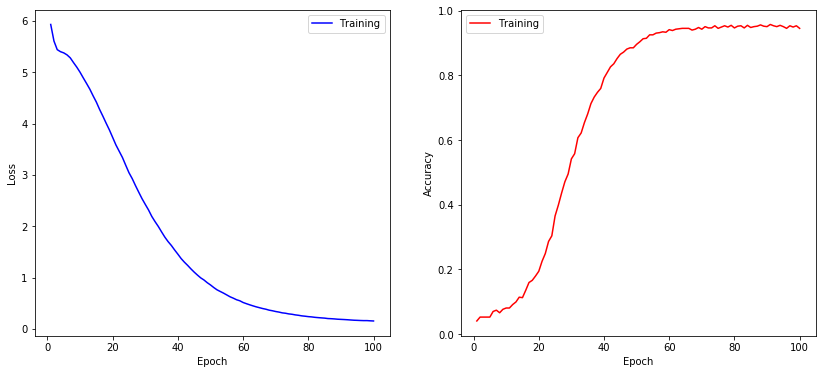

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model(history):
    loss_train = history.history['loss']
    acc_train = history.history['acc']

    epochs = range(1, len(loss_train)+1)

    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_train,'b')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training'], loc='best')

    plt.subplot(1,2,2)
    plt.plot(epochs, acc_train,'r')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training'], loc='best')
    plt.show()
    
plot_model(history)

&#x270d; Now, let us take a look at predicting words using the model that we trained. We are going to ask it to generate the next 50 words for the given seed text.

In [0]:
seed_text = "I'm suffering in this dearth"
next_words = 50

for _ in range(next_words):
    # Create a token lists using tokenizer text sequences of the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pre-pad the token list with the length of max_sequence_length-1
    token_list_padded = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    
    # Predict the classe for the given token list 
    predicted = model.predict_classes(token_list_padded, verbose=0)

    # Turn the token back into a word and add that to the seed text
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print(seed_text)

I'm suffering in this dearth you may as well as well as as as as as well with well with lift them away away away it undo yourselves very dog to the commonalty proud which own please price price please fathers price price with heard with repetition price it price price to say to that


#### Bidirectional LSTM <a id="bi_lstm"></a>

&#x270d; Create a model with Bidirectional LSTM nodes.

In [0]:
from tensorflow.keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11, 100)           38600     
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense_1 (Dense)              (None, 386)               116186    
Total params: 455,986
Trainable params: 455,986
Non-trainable params: 0
_________________________________________________________________


&#x270d; Compile and fit your model.

In [0]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y, epochs=10, verbose=1)

Train on 748 samples
Epoch 1/10
748/748 [==============================] - 3s 3ms/sample - loss: 5.8933 - acc: 0.0401
Epoch 2/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.5414 - acc: 0.0521
Epoch 3/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.4058 - acc: 0.0521
Epoch 4/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.3352 - acc: 0.0548
Epoch 5/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.2367 - acc: 0.0642
Epoch 6/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.0956 - acc: 0.0695
Epoch 7/10
748/748 [==============================] - 2s 2ms/sample - loss: 4.9549 - acc: 0.0735
Epoch 8/10
748/748 [==============================] - 2s 2ms/sample - loss: 4.7988 - acc: 0.0789
Epoch 9/10
748/748 [==============================] - 2s 2ms/sample - loss: 4.6512 - acc: 0.0829
Epoch 10/10
748/748 [==============================] - 2s 2ms/sample - loss: 4.5279 - acc: 0.0896


&#x270d; Plotting loss and accuracy over training epochs.

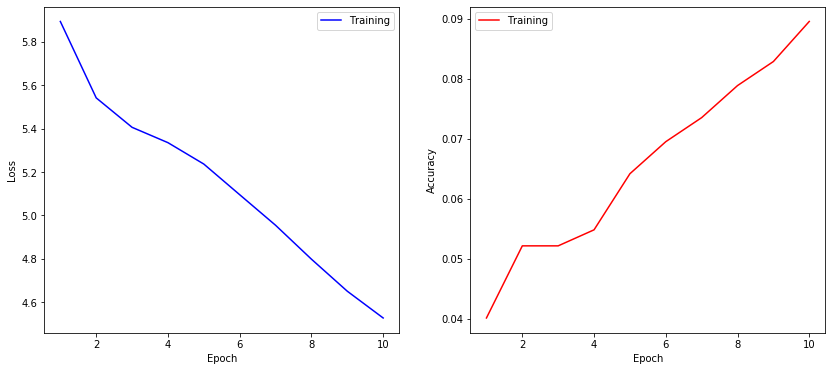

In [0]:
plot_model(history)

&#x270d; Generating words for the given seed text.

In [0]:
seed_text = "I'm suffering in this dearth"
next_words = 50

for _ in range(next_words):
    # Create a token lists using tokenizer text sequences of the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pre-pad the token list with the length of max_sequence_length-1
    token_list_padded = pad_sequences([token_list], maxlen= max_sequence_length-1, padding= 'pre')
    
    # Predict the classe for the given token list 
    predicted = model.predict_classes(token_list_padded, verbose=0)

    # Turn the token back into a word and add that to the seed text
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print(seed_text)

I'm suffering in this dearth citizen the belly belly belly can can will were price can revenge us revenge us they will will were price can will will were price price price were price price price were price price price were price price price were price price price were price price price were price price
